In [12]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import tabulate

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.metrics import accuracy_score , confusion_matrix , precision_score , recall_score , f1_score , classification_report , auc , roc_curve , ConfusionMatrixDisplay ,  roc_auc_score
from sklearn.utils import resample
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.preprocessing import LabelEncoder , RobustScaler , StandardScaler
from sklearn.neural_network import MLPClassifier

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD ,Adam
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping

plt.style.use("fivethirtyeight")
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/creditcardfraud/creditcard.csv
/kaggle/input/classification-test-file/Classification_Test_file.csv


# **Obtain the Data Set**

In [13]:
creditCard = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")

In [14]:
creditCard.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [15]:
creditCard.sample(25)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
127991,78554.0,-1.409143,1.823623,0.495207,0.016903,-0.582365,-1.105016,0.161533,0.599630,-0.149041,...,-0.295540,-0.762303,0.067738,0.317205,-0.050532,0.057875,0.044252,-0.134344,9.72,0
186954,127324.0,2.159682,-0.836047,-1.146836,-1.222590,-0.272831,-0.074663,-0.680814,-0.013301,-0.580944,...,-0.236383,-0.849477,0.410772,0.038002,-0.477906,-0.706075,-0.023734,-0.049323,31.45,0
38298,39333.0,-0.383310,-0.494892,0.509532,-0.901094,1.360444,4.425961,0.109737,0.849889,0.463463,...,-0.107289,-0.327559,0.358396,1.063495,-0.564698,0.978516,-0.099371,-0.064608,187.64,0
245048,152585.0,-0.430840,0.531523,-1.859774,-1.358881,3.612795,3.054045,0.663305,0.327511,0.528750,...,0.083588,0.946189,0.031499,0.631816,-0.241392,-0.177366,0.006958,-0.237201,3.94,0
135968,81488.0,0.922263,-0.262810,1.193821,1.008816,-0.081653,2.164277,-0.970083,0.813072,0.553611,...,0.113919,0.668357,0.104625,-1.009718,0.083377,-0.298795,0.142678,0.014232,9.99,0
124861,77450.0,-0.797207,0.778592,1.407693,-1.385075,-0.305533,-0.454428,0.254228,0.274937,0.274564,...,-0.039907,-0.121157,0.043533,0.225632,-0.389271,0.717957,0.148040,0.112841,2.31,0
126490,78017.0,-0.531179,0.807309,0.401682,0.895299,-0.425644,-0.097162,0.772807,0.359484,-1.051684,...,0.293194,0.495197,0.225042,0.007022,-0.047884,-0.330938,-0.095537,-0.020394,153.34,0
195590,131134.0,2.153990,-0.838542,-1.286632,-0.941386,-0.722589,-1.193465,-0.461716,-0.236294,-0.636762,...,0.485021,1.309919,-0.011035,0.110237,0.121069,0.045771,-0.051810,-0.075188,25.00,0
282876,171205.0,-0.919149,0.630842,1.571776,-1.914414,1.086252,0.543283,0.523075,0.326195,-0.048291,...,-0.157585,-0.627002,-0.396759,-0.352444,0.640457,-0.664273,0.011412,0.047974,1.18,0
91872,63664.0,1.040667,-0.897727,1.249574,0.830147,-1.630684,0.067812,-1.030831,0.234461,-0.140447,...,-0.153784,-0.039418,0.004765,0.348179,0.195314,-0.235858,0.084076,0.052688,93.80,0


# **Exploring the Data Set**

In [16]:
creditCard.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [17]:
creditCard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [18]:
print(f"The Data Set contain {creditCard.shape[0]} Rows & {creditCard.shape[1]} Columns")
print(f"The Data Set contain {creditCard.duplicated().sum()} record duplicated") # Flag Here
print(f"Number of Nulls in each features :\n{creditCard.isna().sum()}")

The Data Set contain 284807 Rows & 31 Columns
The Data Set contain 1081 record duplicated
Number of Nulls in each features :
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


# **Imbalanced Features Resolving** Adham Trial

In [19]:
X, y = creditCard.drop('Class', axis=1), creditCard['Class']

smote = SMOTE(random_state=42)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X, y)

X_train, X_val, y_train, y_val = train_test_split( X_resampled_smote, y_resampled_smote, test_size=0.2, random_state=42)

scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

testFile = pd.read_csv("/kaggle/input/classification-test-file/Classification_Test_file.csv")
testFile_scaled = scaler.transform(testFile)

print(X_train.shape , y_train.shape)

(454904, 30) (454904,)


# **Modeling Our Data**

## **Neural Networks**

**1st Trial**

* I've Used 3 Hidden Layers with ( 512 , 256 , 128)
* Activation Function in the 3 Hidden Layers **relu**
* Actication Function in the Output Layer **soft max**
* Optimizer : **Adam** with :
   1. learning rate **0.0005**
   2. loss **'sparse_categorical_crossentropy'**
   3. metrics **'accuracy'**
* Number of Epochs **10**
* Batch Size **32**
* f1 score (0.99850)
--------------------------------------------------------------------------------------
**2nd Trial**

* I've Used 3 Hidden Layers with  ( 512 , 256 , 128)
* Activation Function in the 3 Hidden Layers **relu**
* Actication Function in the Output Layer **soft max**
* Optimizer : **Adam** with :
   1. learning rate **0.0005**
   2. loss **'sparse_categorical_crossentropy'**
   3. metrics **'accuracy'**
* Number of Epochs **25**
* Batch Size **32**
* f1 score (0.99851)
* --------------------------------------------------------------------------------------
**3rd Trial**

* I've Used 3 Hidden Layers with  ( 512 , 256 , 128)
* Activation Function in the 3 Hidden Layers **relu**
* Actication Function in the Output Layer **soft max**
* Optimizer : **Adam** with :
   1. learning rate **0.0005**
   2. loss **'sparse_categorical_crossentropy'**
   3. metrics **'accuracy'**
* Number of Epochs **50**
* Batch Size **32**
* f1 score (1.0000)
--------------------------------------------------------------------------------------
**4th Trial**

* I've Used 3 Hidden Layers with (256 , 128 , 64)
* Activation Function in the 3 Hidden Layers **relu**
* Actication Function in the Output Layer **soft max**
* Optimizer : **Adam** with :
   1. learning rate **0.0005**
   2. loss **'sparse_categorical_crossentropy'**
   3. metrics **'accuracy'**
* Number of Epochs **10**
* Batch Size **32**
* f1 score (0.99850)
--------------------------------------------------------------------------------------
**5th Trial**

* I've Used 3 Hidden Layers with (256 , 128 , 64)
* Activation Function in the 3 Hidden Layers **relu**
* Actication Function in the Output Layer **soft max**
* Optimizer : **Adam** with :
   1. learning rate **0.0005**
   2. loss **'sparse_categorical_crossentropy'**
   3. metrics **'accuracy'**
* Number of Epochs **25**
* Batch Size **32**
* f1 score ()
-------------------------------------------------------------------------------------
**6th Trial**

* I've Used 3 Hidden Layers with (256 , 128 , 64)
* Activation Function in the 3 Hidden Layers **relu**
* Actication Function in the Output Layer **soft max**
* Optimizer : **Adam** with :
   1. learning rate **0.0005**
   2. loss **'sparse_categorical_crossentropy'**
   3. metrics **'accuracy'**
* Number of Epochs **50**
* Batch Size **32**
* f1 score ()
-------------------------------------------------------------------------------------
**7th Trial**

* I've Used 3 Hidden Layers with (256 , 128 , 32)
* Activation Function in the 3 Hidden Layers **relu**
* Actication Function in the Output Layer **soft max**
* Optimizer : **Adam** with :
   1. learning rate **0.0005**
   2. loss **'sparse_categorical_crossentropy'**
   3. metrics **'accuracy'**
* Number of Epochs **50**
* Batch Size **32**
* f1 score (1.0000)
-------------------------------------------------------------------------------------
**8th Trial**

* I've Used 3 Hidden Layers with (128 , 64 , 32)
* Activation Function in the 3 Hidden Layers **relu**
* Actication Function in the Output Layer **soft max**
* Optimizer : **Adam** with :
   1. learning rate **0.0005**
   2. loss **'sparse_categorical_crossentropy'**
   3. metrics **'accuracy'**
* Number of Epochs **50**
* Batch Size **32**
* f1 score (1.0000)
-------------------------------------------------------------------------------------
**9th Trial**

* I've Used 3 Hidden Layers with (64 , 32 , 16)
* Activation Function in the 3 Hidden Layers **relu**
* Actication Function in the Output Layer **soft max**
* Optimizer : **Adam** with :
   1. learning rate **0.0005**
   2. loss **'sparse_categorical_crossentropy'**
   3. metrics **'accuracy'**
* Number of Epochs **50**
* Batch Size **32**
* f1 score (1.0000)
-------------------------------------------------------------------------------------
**10th Trial**

* I've Used 3 Hidden Layers with (48 , 24 , 12)
* Activation Function in the 3 Hidden Layers **relu**
* Actication Function in the Output Layer **soft max**
* Optimizer : **Adam** with :
   1. learning rate **0.0005**
   2. loss **'sparse_categorical_crossentropy'**
   3. metrics **'accuracy'**
* Number of Epochs **50**
* Batch Size **32**
* f1 score (1.0000)
-------------------------------------------------------------------------------------
**10th Trial**

* I've Used 3 Hidden Layers with (48 , 24 , 12)
* Activation Function in the 3 Hidden Layers **relu**
* Actication Function in the Output Layer **soft max**
* Optimizer : **SGD** with :
   1. learning rate **0.0005**
   2. loss **'sparse_categorical_crossentropy'**
   3. metrics **'accuracy'**
* Number of Epochs **50**
* Batch Size **32**
* f1 score (0.977)
-------------------------------------------------------------------------------------
> I will Use Early Stopping on the 3 hidden layers (48 , 24 , 12) with offcourse Adam Optimizer

In [20]:
len(np.unique(y_train))

2

In [21]:
modelAdam = Sequential()
modelAdam.add(Dense(48, input_dim=X_train.shape[1], activation='relu'))  
modelAdam.add(Dense(24, activation='relu')) 
modelAdam.add(Dense(12, activation='relu'))  
modelAdam.add(Dense(2, activation='softmax'))

early_stopping = EarlyStopping(
    monitor='val_accuracy',   
    patience=5,               
    restore_best_weights=True 
)

modelAdam.compile(
    optimizer=Adam(learning_rate=0.0005), 
    loss='sparse_categorical_crossentropy',  
    metrics=['accuracy']
)

history = modelAdam.fit(
    X_train, y_train, 
    validation_data=(X_val, y_val),
    epochs=50, 
    batch_size=32, 
    verbose=1,
    callbacks=[early_stopping] 
)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50


I0000 00:00:1734551818.642752    4067 service.cc:145] XLA service 0x7f92a0007cf0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1734551818.642799    4067 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1734551818.642803    4067 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


  116/14216 ━━━━━━━━━━━━━━━━━━━━ 18s 1ms/step - accuracy: 0.8097 - loss: 0.4830 

I0000 00:00:1734551820.018567    4067 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


14216/14216 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step - accuracy: 0.9797 - loss: 0.0613 - val_accuracy: 0.9974 - val_loss: 0.0087
Epoch 2/50
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.9981 - loss: 0.0070 - val_accuracy: 0.9989 - val_loss: 0.0043
Epoch 3/50
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.9988 - loss: 0.0046 - val_accuracy: 0.9977 - val_loss: 0.0069
Epoch 4/50
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.9991 - loss: 0.0033 - val_accuracy: 0.9995 - val_loss: 0.0025
Epoch 5/50
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.9992 - loss: 0.0029 - val_accuracy: 0.9991 - val_loss: 0.0050
Epoch 6/50
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.9993 - loss: 0.0027 - val_accuracy: 0.9995 - val_loss: 0.0021
Epoch 7/50
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.9994 - loss: 0.0025 - val_accuracy: 0.9993 - val_loss: 0.0028
Epoch 8/50
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.9996 - lo

In [23]:
if early_stopping.stopped_epoch > 0:
    print(f"Training stopped at epoch {early_stopping.stopped_epoch + 1} due to no improvement in validation accuracy.")
    print("Restoring the best model weights.")
else:
    print("Training completed without early stopping.")

best_weights = modelAdam.get_weights()

print("Best weights restored.")

modelAdam.save_weights("best_model.weights.h5")

Training stopped at epoch 20 due to no improvement in validation accuracy.
Restoring the best model weights.
Best weights restored.


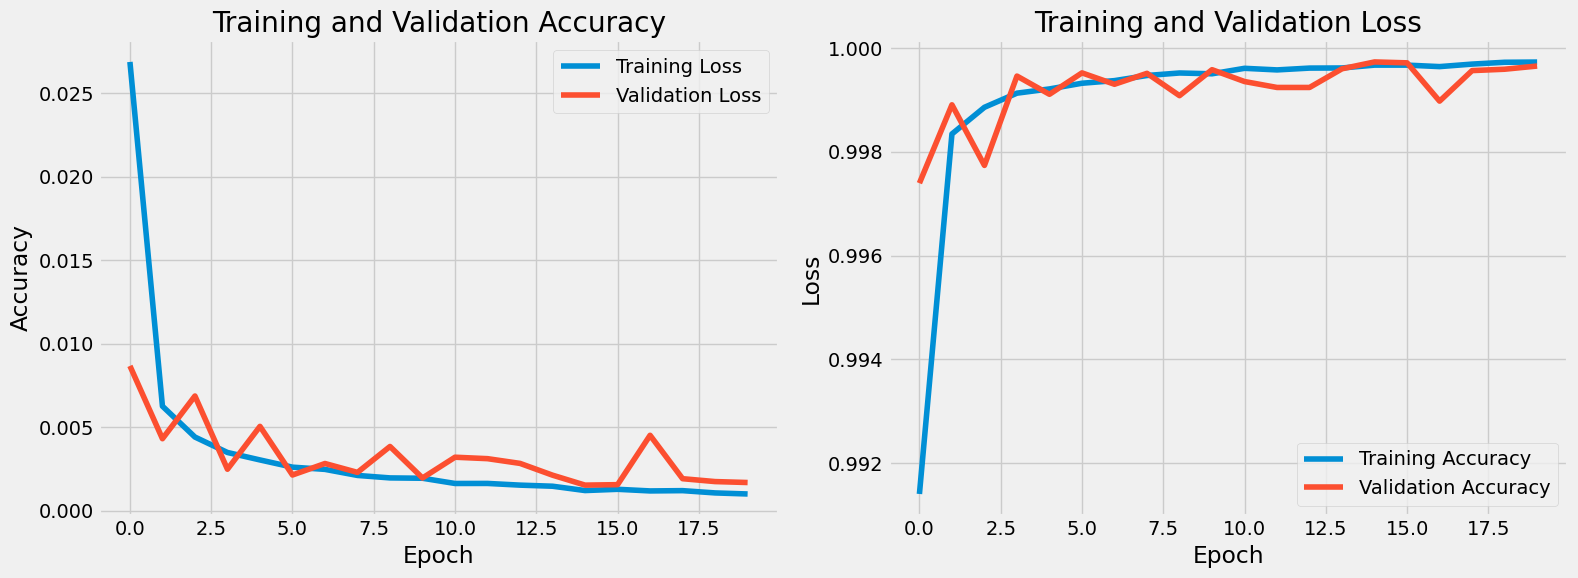

In [24]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.savefig("training_validation_plots.png")
plt.show()

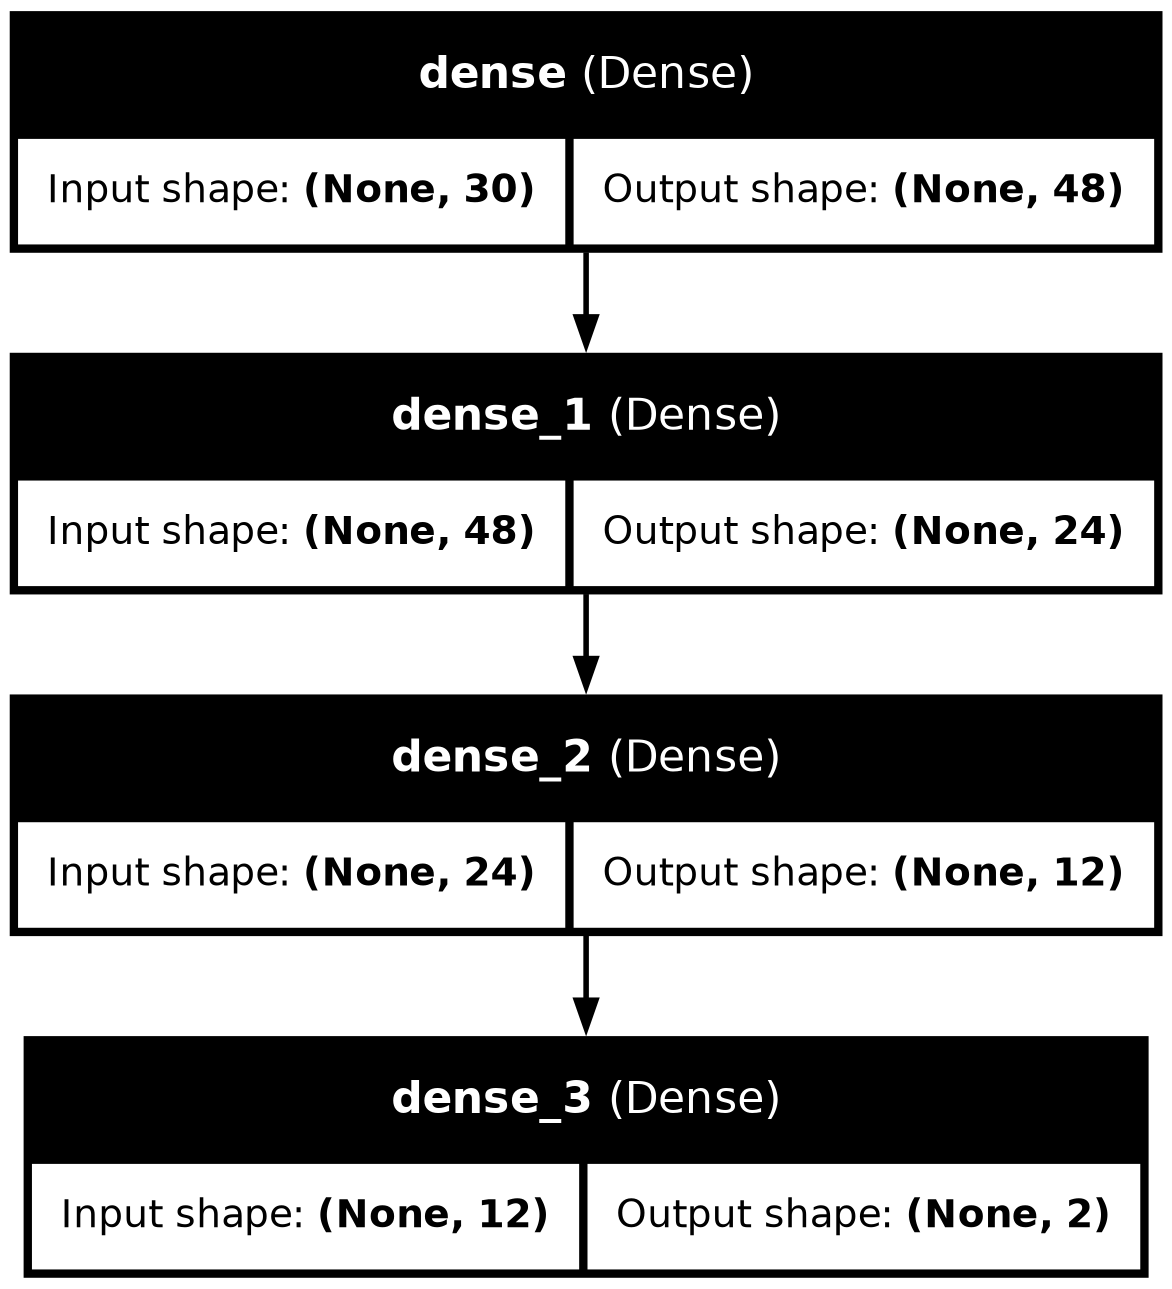

In [25]:
plot_model(modelAdam, to_file='modelAdam.png', show_shapes=True, show_layer_names=True)

In [27]:
y_pred_multiclassAdam = np.argmax(modelAdam.predict(testFile_scaled), axis=1)

dictt = {
    "ID": [i for i in range(len(testFile))],
    "Class": y_pred_multiclassAdam
}
df = pd.DataFrame(dictt)
df.to_csv("Final 3 Layers 20ep ADAM.csv", index=False)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [ ]:
# !rm -rf /kaggle/working/*